<a href="https://colab.research.google.com/github/FranciscoAssislsj/Previsao_preco_carros/blob/main/Ex_RegLinear_Multipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
auto = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
auto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
auto.shape

(205, 26)

In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
auto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [13]:
# Colunas object

colunas = auto.select_dtypes(include = ['object']).columns.tolist()
colunas

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
# Transformando colunas

for col in colunas:
  le.fit(auto[col])
  auto[col] = le.transform(auto[col])

In [17]:
auto.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Axes: xlabel='price', ylabel='Count'>

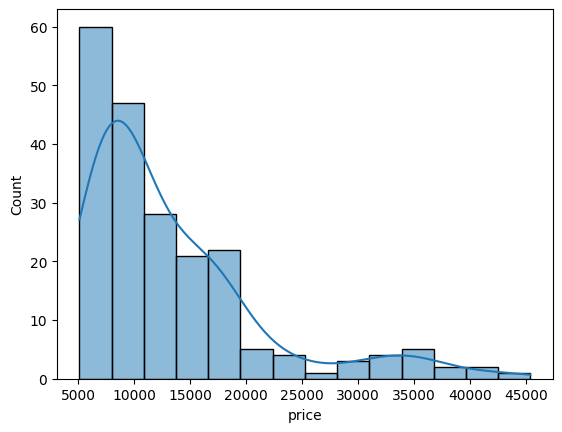

In [21]:
sns.histplot(auto, x = 'price', kde = True)

<Axes: xlabel='doornumber', ylabel='Count'>

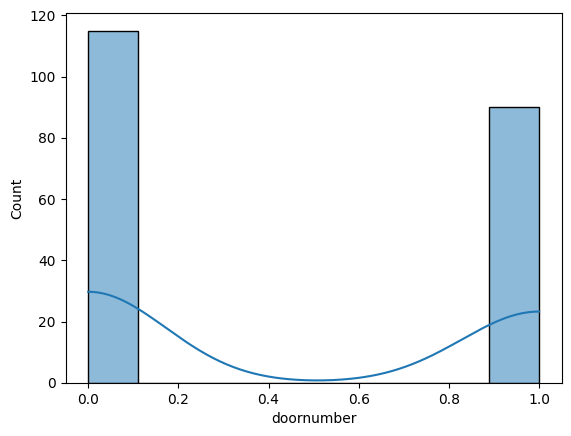

In [60]:
sns.histplot(data = auto, x = 'doornumber', kde = True)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
auto_norm = pd.DataFrame(scaler.fit_transform(auto), index = auto.index, columns = auto.columns)

In [25]:
auto_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [26]:
auto_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='price', ylabel='Count'>

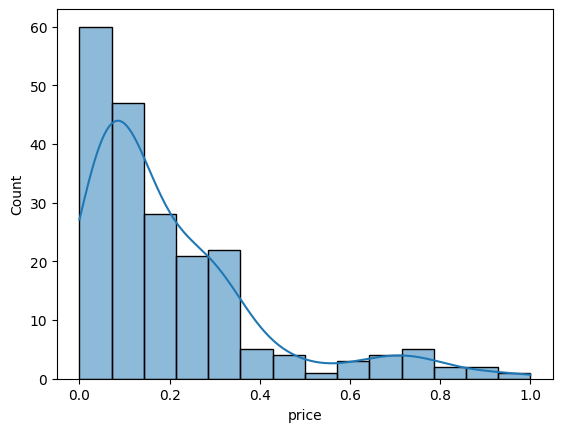

In [31]:
sns.histplot(data = auto_norm, x = 'price', kde = True)

In [29]:
import statsmodels.formula.api as smf

In [30]:
auto.columns.tolist()

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [61]:
function = "price ~ car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.26e-76
Time:                        20:18:36   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

In [34]:
function = "price ~ car_ID+symboling+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     67.27
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           6.65e-77
Time:                        19:54:05   Log-Likelihood:                 276.98
No. Observations:                 205   AIC:                            -504.0
Df Residuals:                     180   BIC:                            -420.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0973      0.077  

In [35]:
function = "price ~ car_ID+symboling+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     70.55
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           8.10e-78
Time:                        19:54:31   Log-Likelihood:                 276.94
No. Observations:                 205   AIC:                            -505.9
Df Residuals:                     181   BIC:                            -426.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0955      0.076  

In [36]:
function = "price ~ car_ID+symboling+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     74.08
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.02e-78
Time:                        19:54:48   Log-Likelihood:                 276.83
No. Observations:                 205   AIC:                            -507.7
Df Residuals:                     182   BIC:                            -431.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1018      0.075  

In [37]:
function = "price ~ car_ID+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     77.97
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.21e-79
Time:                        19:55:06   Log-Likelihood:                 276.76
No. Observations:                 205   AIC:                            -509.5
Df Residuals:                     183   BIC:                            -436.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0917      0.069  

In [38]:
function = "price ~ car_ID+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     82.08
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.68e-80
Time:                        19:55:28   Log-Likelihood:                 276.49
No. Observations:                 205   AIC:                            -511.0
Df Residuals:                     184   BIC:                            -441.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0957      0.069  

In [39]:
function = "price ~ car_ID+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     86.73
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.02e-81
Time:                        19:55:48   Log-Likelihood:                 276.34
No. Observations:                 205   AIC:                            -512.7
Df Residuals:                     185   BIC:                            -446.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0865      0.066  

In [40]:
function = "price ~ car_ID+CarName+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+stroke+compressionratio+horsepower+peakrpm+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     91.74
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           2.71e-82
Time:                        19:56:12   Log-Likelihood:                 276.04
No. Observations:                 205   AIC:                            -514.1
Df Residuals:                     186   BIC:                            -450.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1034      0.062  

In [41]:
function = "price ~ car_ID+CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+stroke+compressionratio+horsepower+peakrpm+highwaympg"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     97.31
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           3.66e-83
Time:                        19:56:27   Log-Likelihood:                 275.70
No. Observations:                 205   AIC:                            -515.4
Df Residuals:                     187   BIC:                            -455.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0916      0.060  

In [42]:
function = "price ~ car_ID+CarName+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+stroke+compressionratio+horsepower+peakrpm"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           5.67e-84
Time:                        19:56:49   Log-Likelihood:                 275.18
No. Observations:                 205   AIC:                            -516.4
Df Residuals:                     188   BIC:                            -459.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0514      0.044  

In [43]:
function = "price ~ car_ID+CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+cylindernumber+enginesize+stroke+compressionratio+horsepower+peakrpm"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     110.3
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           7.89e-85
Time:                        19:57:12   Log-Likelihood:                 274.74
No. Observations:                 205   AIC:                            -517.5
Df Residuals:                     189   BIC:                            -464.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0623      0.043  

In [44]:
function = "price ~ car_ID+CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     117.9
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           1.35e-85
Time:                        19:57:27   Log-Likelihood:                 274.05
No. Observations:                 205   AIC:                            -518.1
Df Residuals:                     190   BIC:                            -468.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0479      0.041  

In [45]:
function = "price ~ car_ID+CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm -1"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              255.1
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                   2.32e-115
Time:                        19:57:43   Log-Likelihood:                          273.30
No. Observations:                 205   AIC:                                     -518.6
Df Residuals:                     191   BIC:                                     -472.1
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [46]:
function = "price ~ CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower+peakrpm -1"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                   5.21e-116
Time:                        19:57:56   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [47]:
function = "price ~ CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+compressionratio+horsepower -1"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              289.2
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                   2.70e-116
Time:                        19:58:22   Log-Likelihood:                          269.51
No. Observations:                 205   AIC:                                     -515.0
Df Residuals:                     193   BIC:                                     -475.1
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [48]:
function = "price ~ CarName+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+enginesize+stroke+compressionratio+horsepower -1"
model = smf.ols(formula = function, data = auto_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              311.6
Date:                Tue, 01 Apr 2025   Prob (F-statistic):                   7.55e-117
Time:                        19:58:42   Log-Likelihood:                          267.78
No. Observations:                 205   AIC:                                     -513.6
Df Residuals:                     194   BIC:                                     -477.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [49]:
x = auto_norm[['CarName','doornumber','carbody','drivewheel','enginelocation','carwidth','carheight','enginesize','stroke','compressionratio','horsepower']]

y = auto_norm[['price']]

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [53]:
r_squared = lr.score(x_train,y_train)
print(r_squared)

0.8971694778827785


In [54]:
from sklearn import metrics

In [56]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train,y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))

MAE: 0.048378800411130796
MSE: 0.003779391457954457
RMSE: 0.06147675542800268


In [57]:
y_pred_test = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE: 0.052165096849939446
MSE: 0.006757711483635351
RMSE: 0.08220530082443195
